# $\Psi$ Method

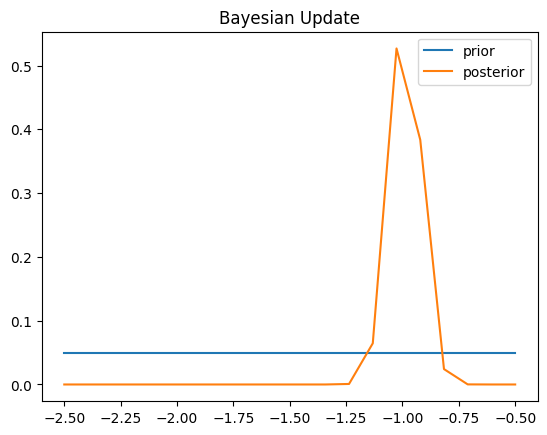

-0.9877811955438214


In [1]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x,th,b=3):
    
    # x   stimulus intensity
    # th  threshold
    # b   slope
    nAFC = 2
    AFC = False
    
    y = 1/(1+np.exp(-b*(x-th)))
    
    if AFC:
        y = 1/nAFC + (1-1/nAFC)*y
    
    return y

def entropy(p):
    
    H = -p*np.log(p)
    
    return H

x = np.linspace(-3,0,1000) # log values (ex contrast)
theta_true = -1 # groundtruth
nT = 20 # number trials
theta_range = np.linspace(-2.5,-0.5,nT)

prior = prior_ = np.ones(nT)/nT

nTrial = 100

for t in range(nTrial):

    # Pick next stimulus
    H = 0
    for i,theta in enumerate(theta_range):
        y = sigmoid(x,theta)
        H += (entropy(y) + entropy(1-y))*prior[i]
    x_next = x[np.argmax(H)]
    
    # Simulating observer
    p_next_true = sigmoid(x_next,theta_true)
    response = np.random.choice([0, 1], p=[1-p_next_true, p_next_true])

    # Bayesian update
    likelihood = np.zeros(nT)
    for i, theta in enumerate(theta_range):
        psi = sigmoid(x_next,theta)
        if response:
            likelihood[i] = psi
        else:
            likelihood[i] = 1-psi
    posterior = np.multiply(prior,likelihood)/(sum(np.multiply(prior,likelihood)))
    prior = posterior

    if t==nTrial-1:
        plt.plot(theta_range,prior_, label='prior')
        plt.plot(theta_range,posterior, label='posterior')
        plt.title('Bayesian Update')
        plt.legend()
        plt.show()
    
theta_est = sum(theta_range*posterior)
print(theta_est)